<a href="https://colab.research.google.com/github/ZahraArshia/CTI_crawl/blob/main/hackerNewsDataformatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import json

In [ ]:
with open('/content/drive/MyDrive/dataset/hackerNews.json') as f:
    data = json.load(f)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,comment,link
0,\nResearchers from the Vrije Universiteit Amst...,https://thehackernews.com/2023/12/slam-attack-...
1,\nThe threat actor known as COLDRIVER has cont...,https://thehackernews.com/2023/12/microsoft-wa...
2,\nThe Russian founder of the now-defunct Bitzl...,https://thehackernews.com/2023/12/founder-of-b...
3,\nCompromising the browser is a high-return ta...,https://thehackernews.com/2023/12/new-report-u...
4,\nWordPress has released version 6.4.2 with a ...,https://thehackernews.com/2023/12/wordpress-re...
...,...,...
7016,\n\n\n\nPRIVACY – a bit of an Internet buzzwor...,https://thehackernews.com/2015/10/privatoria-b...
7017,\n\n\n\nThe arrest is the first major outcome ...,https://thehackernews.com/2015/10/talktalk-hac...
7018,\n\n\n\nThe German authorities have initiated ...,https://thehackernews.com/2015/10/nsa-spying-m...
7019,\n\n\n\nSecurity researchers at Symantec have ...,https://thehackernews.com/2015/10/computer-mal...


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenized_sentence(df):
  """Tokenizes the text in a Pandas DataFrame column of strings.

  Args:
    df: A Pandas DataFrame containing a column of strings to be tokenized.

  Returns:
    A Pandas DataFrame containing a column of tokenized words.
  """

  df['sentences'] = df['comment'].apply(sent_tokenize)
  df = df.explode('sentences')
  return df

In [ ]:
df = tokenized_sentence(df)
df

,comment,link,sentences
0,\nResearchers from the Vrije Universiteit Amst...,https://thehackernews.com/2023/12/slam-attack-...,\nResearchers from the Vrije Universiteit Amst...
0,\nResearchers from the Vrije Universiteit Amst...,https://thehackernews.com/2023/12/slam-attack-...,The attack is an end-to-end exploit for Spectr...
0,\nResearchers from the Vrije Universiteit Amst...,https://thehackernews.com/2023/12/slam-attack-...,"""SLAM exploits unmasked gadgets to let a userl..."
0,\nResearchers from the Vrije Universiteit Amst...,https://thehackernews.com/2023/12/slam-attack-...,UPCOMING WEBINAR Cracking the Code: Learn How...
0,\nResearchers from the Vrije Universiteit Amst...,https://thehackernews.com/2023/12/slam-attack-...,Dive deep into the psychology of cyber attacke...
...,...,...,...
7020,\n\n\n\nA large number of third-party Android ...,https://thehackernews.com/2015/10/android-apps...,The users who are not at risk because of this ...
7020,\n\n\n\nA large number of third-party Android ...,https://thehackernews.com/2015/10/android-apps...,Users that download apps only from the officia...
7020,\n\n\n\nA large number of third-party Android ...,https://thehackernews.com/2015/10/android-apps...,As this threat is discovered with the current ...
7020,\n\n\n\nA large number of third-party Android ...,https://thehackernews.com/2015/10/android-apps...,Found this article interesting?


In [ ]:
df = df.drop(columns=['comment'])
df = df.drop(columns=['link'])
df

,sentences
0,\nResearchers from the Vrije Universiteit Amst...
0,The attack is an end-to-end exploit for Spectr...
0,"""SLAM exploits unmasked gadgets to let a userl..."
0,UPCOMING WEBINAR Cracking the Code: Learn How...
0,Dive deep into the psychology of cyber attacke...
...,...
7020,The users who are not at risk because of this ...
7020,Users that download apps only from the officia...
7020,As this threat is discovered with the current ...
7020,Found this article interesting?


In [ ]:
import re
def clean_text_for_ner(text_data):
  # Remove noise.
  text_data = re.sub(r"[^\w\s]", "", text_data)
  text_data = re.sub('\n', '', text_data)

  # Normalize the text.
  text_data = text_data.lower()

  # remove additional space
  text_data = re.sub(' +', ' ', text_data)

  return text_data

In [ ]:
df['sentences'] = df['sentences'].apply(clean_text_for_ner)
df

,sentences
0,researchers from the vrije universiteit amster...
0,the attack is an endtoend exploit for spectre ...
0,slam exploits unmasked gadgets to let a userla...
0,upcoming webinar cracking the code learn how c...
0,dive deep into the psychology of cyber attacke...
...,...
7020,the users who are not at risk because of this ...
7020,users that download apps only from the officia...
7020,as this threat is discovered with the current ...
7020,found this article interesting


In [ ]:
# Count the number of duplicate values in the 'text' column
number_of_duplicated_values = df['sentences'].duplicated().sum()

# Print the number of duplicate values
print(number_of_duplicated_values)

27851


In [ ]:
df.drop_duplicates(subset=['sentences'], inplace=True)
df

,sentences
0,researchers from the vrije universiteit amster...
0,the attack is an endtoend exploit for spectre ...
0,slam exploits unmasked gadgets to let a userla...
0,upcoming webinar cracking the code learn how c...
0,dive deep into the psychology of cyber attacke...
...,...
7020,also read how chinese hacking groups are make ...
7020,the researchers claim that the library is blin...
7020,the users who are not at risk because of this ...
7020,users that download apps only from the officia...


In [ ]:
df.dropna(subset=["sentences"], inplace=True)
df

,sentences
0,researchers from the vrije universiteit amster...
0,the attack is an endtoend exploit for spectre ...
0,slam exploits unmasked gadgets to let a userla...
0,upcoming webinar cracking the code learn how c...
0,dive deep into the psychology of cyber attacke...
...,...
7020,also read how chinese hacking groups are make ...
7020,the researchers claim that the library is blin...
7020,the users who are not at risk because of this ...
7020,users that download apps only from the officia...


In [ ]:
# Get the max and the average of the `sentence` column values
max_sentence_length = df['sentences'].str.len().max()
average_sentence_length = df['sentences'].str.len().mean()

# Print the max and the average sentence lengths
print('Max sentence length:', max_sentence_length)
print('Average sentence length:', average_sentence_length)

Max sentence length: 5489
Average sentence length: 170.55348271465627


In [ ]:
text_lengths = df['sentences'].str.len()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

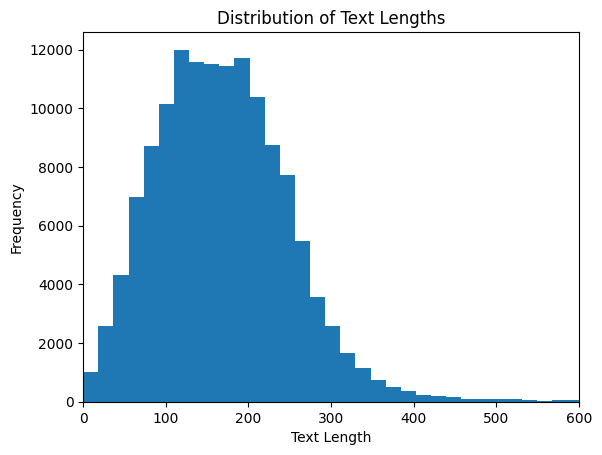

In [ ]:
plt.hist(text_lengths, bins = 300)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.xlim(0,600)
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenized_words(df):
  """Tokenizes the text in a Pandas DataFrame column of strings.

  Args:
    df: A Pandas DataFrame containing a column of strings to be tokenized.

  Returns:
    A Pandas DataFrame containing a column of tokenized words.
  """

  df['tokens'] = df['sentences'].apply(word_tokenize)
  df = df.explode('tokens')
  return df

In [ ]:
df = tokenized_words(df)

In [ ]:
df

,sentences,tokens
0,researchers from the vrije universiteit amster...,researchers
0,researchers from the vrije universiteit amster...,from
0,researchers from the vrije universiteit amster...,the
0,researchers from the vrije universiteit amster...,vrije
0,researchers from the vrije universiteit amster...,universiteit
...,...,...
7020,as this threat is discovered with the current ...,earlier
7020,as this threat is discovered with the current ...,versions
7020,as this threat is discovered with the current ...,of
7020,as this threat is discovered with the current ...,the


In [ ]:
df = df.reset_index()
df

,index,sentences,tokens
0,0,researchers from the vrije universiteit amster...,researchers
1,0,researchers from the vrije universiteit amster...,from
2,0,researchers from the vrije universiteit amster...,the
3,0,researchers from the vrije universiteit amster...,vrije
4,0,researchers from the vrije universiteit amster...,universiteit
...,...,...,...
3665720,7020,as this threat is discovered with the current ...,earlier
3665721,7020,as this threat is discovered with the current ...,versions
3665722,7020,as this threat is discovered with the current ...,of
3665723,7020,as this threat is discovered with the current ...,the


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import pos_tag

In [ ]:
nltk.pos_tag(['Hello'])

[('Hello', 'NN')]

In [ ]:
type(df.iloc[0,2])

str

In [ ]:
df['pos'] = df['tokens'].dropna().apply(lambda word: nltk.pos_tag([word])[0][1])

In [ ]:
df

,index,sentences,tokens,pos
0,0,researchers from the vrije universiteit amster...,researchers,NNS
1,0,researchers from the vrije universiteit amster...,from,IN
2,0,researchers from the vrije universiteit amster...,the,DT
3,0,researchers from the vrije universiteit amster...,vrije,NN
4,0,researchers from the vrije universiteit amster...,universiteit,NN
...,...,...,...,...
3665720,7020,as this threat is discovered with the current ...,earlier,RBR
3665721,7020,as this threat is discovered with the current ...,versions,NNS
3665722,7020,as this threat is discovered with the current ...,of,IN
3665723,7020,as this threat is discovered with the current ...,the,DT


In [ ]:
print(df['pos'].unique())

['NNS' 'IN' 'DT' 'NN' 'VB' 'VBN' 'JJ' 'MD' 'TO' 'CC' 'VBG' 'VBZ' 'RB'
 'PRP$' 'VBD' 'PRP' 'WRB' 'WDT' 'CD' 'RBR' 'VBP' 'JJS' 'WP' 'JJR' 'WP$'
 nan 'LS']


In [ ]:
df.to_csv('hacker_news_cleaned.csv', index=False)